In [1]:
# ============================================================================
# IMPORTATION DES BIBLIOTHÈQUES
# ============================================================================
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Configuration de l'affichage
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [3]:
# ============================================================================
# ÉTAPE 1: CHARGEMENT DES DONNÉES
# ============================================================================
print("="*80)
print("ÉTAPE 1: CHARGEMENT DES DONNÉES")
print("="*80)

ÉTAPE 1: CHARGEMENT DES DONNÉES


In [4]:
# Chargement du dataset depuis Kaggle
# Option 1: Télécharger directement sans spécifier de fichier
try:
    # Télécharge le dataset complet
    path = kagglehub.dataset_download("zahranusrat/students-performance-in-exams")
    print(f"Dataset téléchargé dans: {path}")

    # Charger le fichier CSV (généralement StudentsPerformance.csv)
    import os
    csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
    print(f"Fichiers CSV trouvés: {csv_files}")

    if csv_files:
        df = pd.read_csv(os.path.join(path, csv_files[0]))
    else:
        raise FileNotFoundError("Aucun fichier CSV trouvé")

except Exception as e:
    print(f"Erreur avec kagglehub: {e}")
    print("\nUtilisation d'une méthode alternative...")
    # Option 2: Charger directement avec pandas si le dataset est public
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/StudentsPerformance.csv"
    df = pd.read_csv(url)

print(f"\n✓ Dataset chargé avec succès!")
print(f"Nombre de lignes: {df.shape[0]}")
print(f"Nombre de colonnes: {df.shape[1]}")
print(f"\nAperçu des premières lignes:")
print(df.head())


Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Dataset téléchargé dans: /kaggle/input/students-performance-in-exams
Fichiers CSV trouvés: ['StudentsPerformance (1).csv']

✓ Dataset chargé avec succès!
Nombre de lignes: 1000
Nombre de colonnes: 8

Aperçu des premières lignes:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95    

In [5]:
# ============================================================================
# ÉTAPE 2: EXPLORATION INITIALE DES DONNÉES
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 2: EXPLORATION INITIALE DES DONNÉES")
print("="*80)

# Affichage des informations générales
print("\nInformations sur le dataset:")
print(df.info())

# Affichage des statistiques descriptives
print("\nStatistiques descriptives:")
print(df.describe())

# Affichage des noms de colonnes
print("\nNoms des colonnes:")
print(df.columns.tolist())


ÉTAPE 2: EXPLORATION INITIALE DES DONNÉES

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Statistiques descriptives:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      1

In [6]:
# ============================================================================
# ÉTAPE 3: NETTOYAGE DES DONNÉES
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 3: NETTOYAGE DES DONNÉES")
print("="*80)



ÉTAPE 3: NETTOYAGE DES DONNÉES


In [7]:
# Création d'une copie pour le nettoyage
df_clean = df.copy()


In [8]:
# 3.1: Vérification des valeurs manquantes
print("\n3.1: Vérification des valeurs manquantes")
missing_values = df_clean.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("✓ Aucune valeur manquante détectée")
else:
    print(f"⚠ {missing_values.sum()} valeurs manquantes détectées")
    # Suppression des lignes avec valeurs manquantes
    df_clean = df_clean.dropna()
    print(f"✓ Valeurs manquantes supprimées. Nouvelles dimensions: {df_clean.shape}")



3.1: Vérification des valeurs manquantes
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
✓ Aucune valeur manquante détectée


In [9]:
# 3.2: Vérification des doublons
print("\n3.2: Vérification des doublons")
duplicates = df_clean.duplicated().sum()
print(f"Nombre de doublons: {duplicates}")
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"✓ Doublons supprimés. Nouvelles dimensions: {df_clean.shape}")
else:
    print("✓ Aucun doublon détecté")



3.2: Vérification des doublons
Nombre de doublons: 0
✓ Aucun doublon détecté


In [10]:
# 3.3: Standardisation des noms de colonnes
print("\n3.3: Standardisation des noms de colonnes")
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(' ', '_')
print("✓ Noms de colonnes standardisés:")
print(df_clean.columns.tolist())



3.3: Standardisation des noms de colonnes
✓ Noms de colonnes standardisés:
['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']


In [11]:
# 3.4: Création de nouvelles variables utiles
print("\n3.4: Création de variables dérivées")
# Score moyen total
df_clean['average_score'] = df_clean[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
print("✓ Variable 'average_score' créée")


3.4: Création de variables dérivées
✓ Variable 'average_score' créée


In [12]:
# Catégorie de performance (pour régression logistique)
# Pass = score moyen >= 50, Fail = score moyen < 50
df_clean['performance_category'] = (df_clean['average_score'] >= 50).astype(int)
print("✓ Variable 'performance_category' créée (0=Fail, 1=Pass)")

✓ Variable 'performance_category' créée (0=Fail, 1=Pass)


In [13]:
# 3.5: Vérification des valeurs aberrantes pour les scores
print("\n3.5: Vérification des valeurs aberrantes")
score_columns = ['math_score', 'reading_score', 'writing_score']
for col in score_columns:
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"{col}: {len(outliers)} valeurs aberrantes détectées (conservées pour analyse)")

print(f"\n✓ Nettoyage terminé! Dimensions finales: {df_clean.shape}")



3.5: Vérification des valeurs aberrantes
math_score: 8 valeurs aberrantes détectées (conservées pour analyse)
reading_score: 6 valeurs aberrantes détectées (conservées pour analyse)
writing_score: 5 valeurs aberrantes détectées (conservées pour analyse)

✓ Nettoyage terminé! Dimensions finales: (1000, 10)


In [14]:
# ============================================================================
# ÉTAPE 4: VISUALISATIONS - HISTOGRAMMES
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 4: VISUALISATIONS - HISTOGRAMMES")
print("="*80)



ÉTAPE 4: VISUALISATIONS - HISTOGRAMMES



4.1: Histogrammes des scores par matière


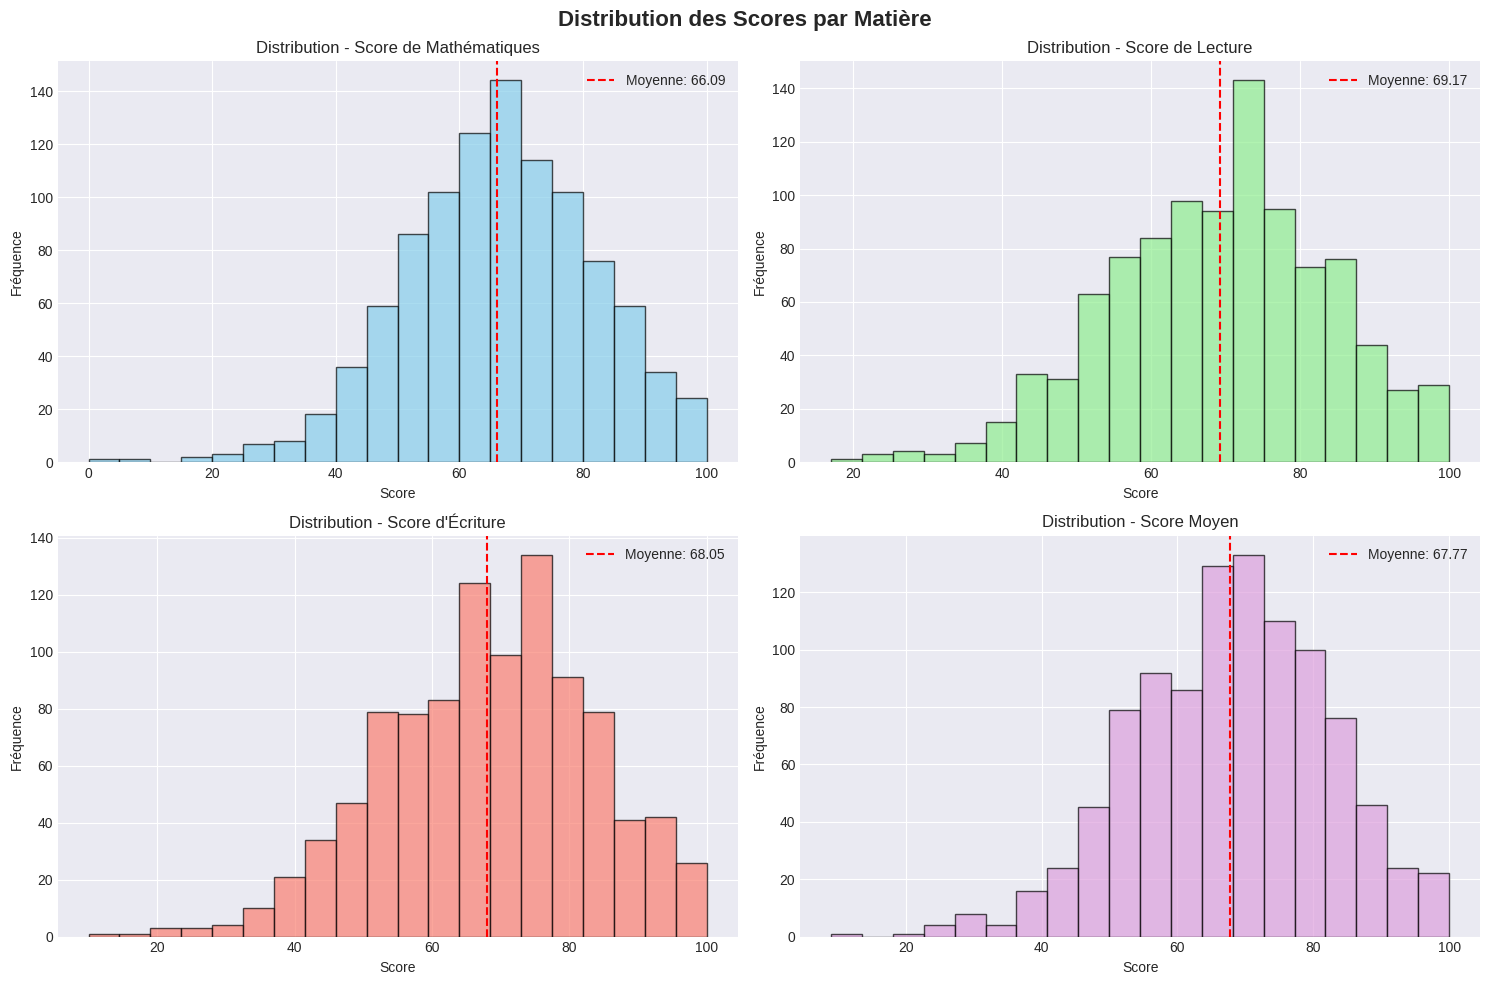

✓ Graphique sauvegardé: histogrammes_scores.png


In [16]:
# 4.1: Distribution des scores par matière
print("\n4.1: Histogrammes des scores par matière")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution des Scores par Matière', fontsize=16, fontweight='bold')

# Histogramme Math
axes[0, 0].hist(df_clean['math_score'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution - Score de Mathématiques')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].axvline(df_clean['math_score'].mean(), color='red', linestyle='--', label=f'Moyenne: {df_clean["math_score"].mean():.2f}')
axes[0, 0].legend()

# Histogramme Reading
axes[0, 1].hist(df_clean['reading_score'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution - Score de Lecture')
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].axvline(df_clean['reading_score'].mean(), color='red', linestyle='--', label=f'Moyenne: {df_clean["reading_score"].mean():.2f}')
axes[0, 1].legend()

# Histogramme Writing
axes[1, 0].hist(df_clean['writing_score'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution - Score d\'Écriture')
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].axvline(df_clean['writing_score'].mean(), color='red', linestyle='--', label=f'Moyenne: {df_clean["writing_score"].mean():.2f}')
axes[1, 0].legend()

# Histogramme Score Moyen
axes[1, 1].hist(df_clean['average_score'], bins=20, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution - Score Moyen')
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].axvline(df_clean['average_score'].mean(), color='red', linestyle='--', label=f'Moyenne: {df_clean["average_score"].mean():.2f}')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('histogrammes_scores.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique sauvegardé: histogrammes_scores.png")


4.2: Distribution des scores par genre


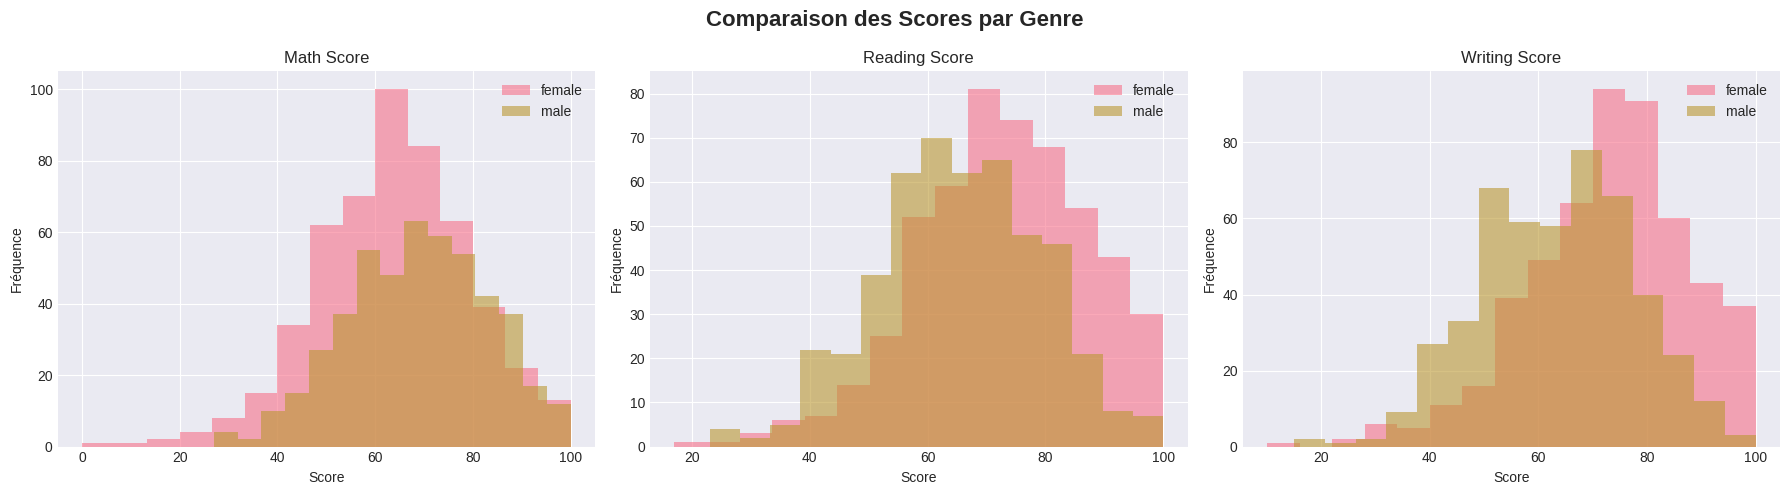

✓ Graphique sauvegardé: histogrammes_genre.png


In [17]:
# 4.2: Scores par Genre
print("\n4.2: Distribution des scores par genre")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Comparaison des Scores par Genre', fontsize=16, fontweight='bold')

for idx, col in enumerate(['math_score', 'reading_score', 'writing_score']):
    df_clean.groupby('gender')[col].plot(kind='hist', alpha=0.6, ax=axes[idx], legend=True, bins=15)
    axes[idx].set_title(f'{col.replace("_", " ").title()}')
    axes[idx].set_xlabel('Score')
    axes[idx].set_ylabel('Fréquence')

plt.tight_layout()
plt.savefig('histogrammes_genre.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique sauvegardé: histogrammes_genre.png")


4.3: Distribution des scores par éducation des parents


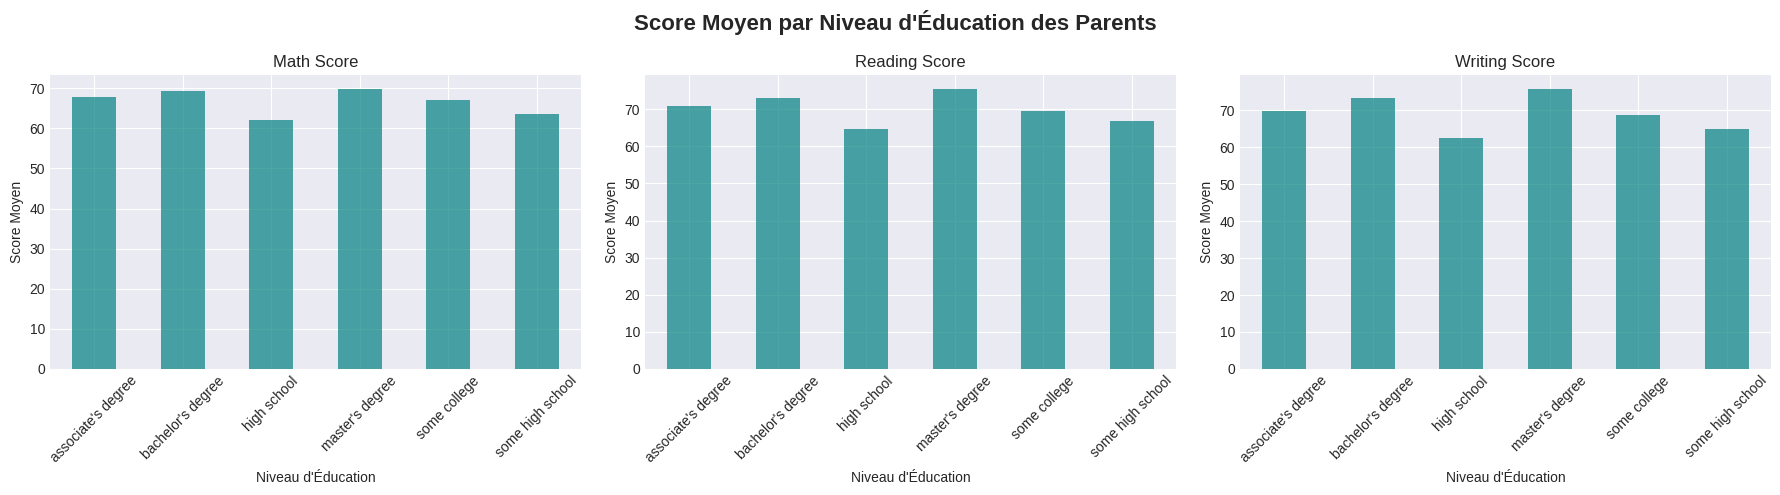

✓ Graphique sauvegardé: histogrammes_education_parents.png


In [18]:
# 4.3: Scores par niveau d'éducation des parents
print("\n4.3: Distribution des scores par éducation des parents")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Score Moyen par Niveau d\'Éducation des Parents', fontsize=16, fontweight='bold')

scores = ['math_score', 'reading_score', 'writing_score']
for idx, score in enumerate(scores):
    df_clean.groupby('parental_level_of_education')[score].mean().plot(kind='bar', ax=axes[idx], color='teal', alpha=0.7)
    axes[idx].set_title(f'{score.replace("_", " ").title()}')
    axes[idx].set_xlabel('Niveau d\'Éducation')
    axes[idx].set_ylabel('Score Moyen')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('histogrammes_education_parents.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique sauvegardé: histogrammes_education_parents.png")



4.4: Impact de la préparation aux examens


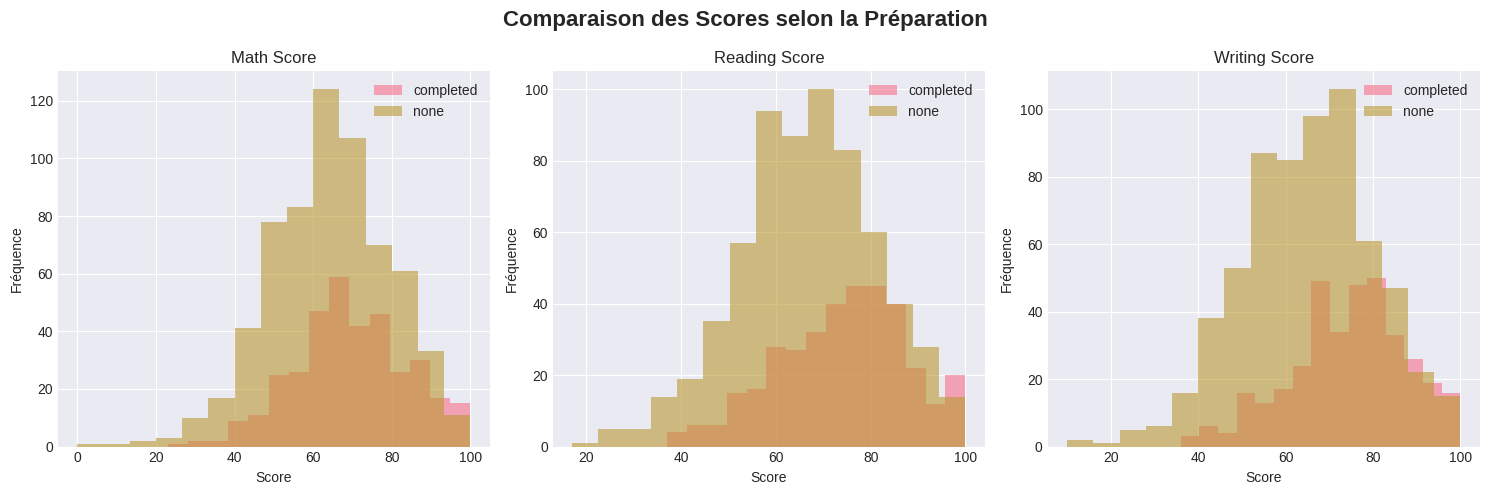

✓ Graphique sauvegardé: histogrammes_preparation.png


In [19]:
# 4.4: Impact de la préparation aux examens
print("\n4.4: Impact de la préparation aux examens")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Comparaison des Scores selon la Préparation', fontsize=16, fontweight='bold')

for idx, col in enumerate(['math_score', 'reading_score', 'writing_score']):
    df_clean.groupby('test_preparation_course')[col].plot(kind='hist', alpha=0.6, ax=axes[idx], legend=True, bins=15)
    axes[idx].set_title(f'{col.replace("_", " ").title()}')
    axes[idx].set_xlabel('Score')
    axes[idx].set_ylabel('Fréquence')

plt.tight_layout()
plt.savefig('histogrammes_preparation.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique sauvegardé: histogrammes_preparation.png")


In [20]:
# ============================================================================
# ÉTAPE 5: RÉGRESSION LINÉAIRE
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 5: RÉGRESSION LINÉAIRE")
print("="*80)


ÉTAPE 5: RÉGRESSION LINÉAIRE


In [21]:
# 5.1: Préparation des données pour régression linéaire
print("\n5.1: Préparation des données")
# Encodage des variables catégorielles
le_gender = LabelEncoder()
le_race = LabelEncoder()
le_education = LabelEncoder()
le_lunch = LabelEncoder()
le_test_prep = LabelEncoder()

df_encoded = df_clean.copy()
df_encoded['gender_encoded'] = le_gender.fit_transform(df_clean['gender'])
df_encoded['race_encoded'] = le_race.fit_transform(df_clean['race/ethnicity'])
df_encoded['education_encoded'] = le_education.fit_transform(df_clean['parental_level_of_education'])
df_encoded['lunch_encoded'] = le_lunch.fit_transform(df_clean['lunch'])
df_encoded['test_prep_encoded'] = le_test_prep.fit_transform(df_clean['test_preparation_course'])

print("✓ Variables catégorielles encodées")



5.1: Préparation des données
✓ Variables catégorielles encodées


In [22]:
# 5.2: Modèle 1 - Prédiction du score de mathématiques
print("\n5.2: Modèle de régression linéaire - Score de Mathématiques")
# Variables indépendantes
X_math = df_encoded[['gender_encoded', 'race_encoded', 'education_encoded', 'lunch_encoded', 'test_prep_encoded']]
y_math = df_encoded['math_score']

# Division train/test
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size=0.2, random_state=42)

# Entraînement du modèle
lr_math = LinearRegression()
lr_math.fit(X_train_math, y_train_math)

# Prédictions
y_pred_math = lr_math.predict(X_test_math)

# Évaluation
r2_math = r2_score(y_test_math, y_pred_math)
rmse_math = np.sqrt(mean_squared_error(y_test_math, y_pred_math))

print(f"R² Score: {r2_math:.4f}")
print(f"RMSE: {rmse_math:.4f}")
print(f"Coefficients: {lr_math.coef_}")
print(f"Intercept: {lr_math.intercept_:.4f}")


5.2: Modèle de régression linéaire - Score de Mathématiques
R² Score: 0.1663
RMSE: 14.2434
Coefficients: [ 4.54174099  2.44533948 -0.41750589 11.43605981 -6.30577755]
Intercept: 56.6742



5.3: Visualisation des prédictions vs valeurs réelles


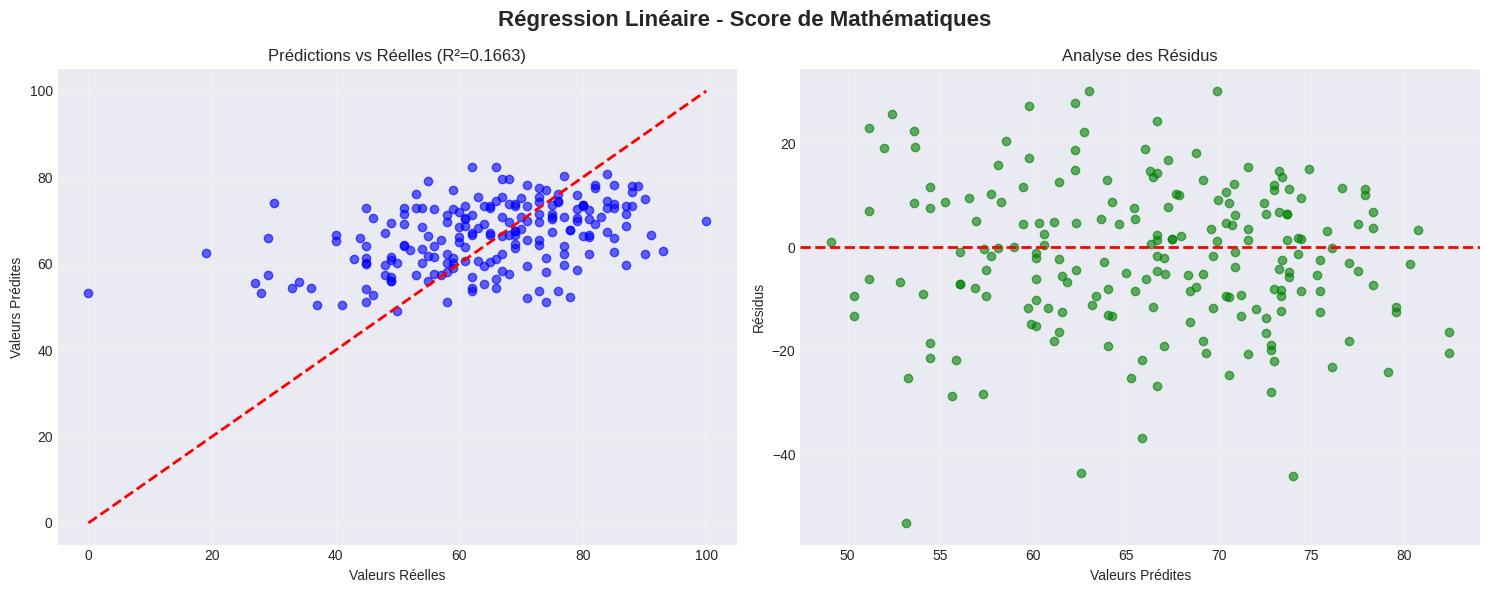

✓ Graphique sauvegardé: regression_lineaire_math.png


In [23]:
# 5.3: Visualisation de la régression linéaire
print("\n5.3: Visualisation des prédictions vs valeurs réelles")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Régression Linéaire - Score de Mathématiques', fontsize=16, fontweight='bold')

# Scatter plot: Valeurs prédites vs réelles
axes[0].scatter(y_test_math, y_pred_math, alpha=0.6, color='blue')
axes[0].plot([y_test_math.min(), y_test_math.max()], [y_test_math.min(), y_test_math.max()], 'r--', lw=2)
axes[0].set_xlabel('Valeurs Réelles')
axes[0].set_ylabel('Valeurs Prédites')
axes[0].set_title(f'Prédictions vs Réelles (R²={r2_math:.4f})')
axes[0].grid(True, alpha=0.3)

# Résidus
residuals = y_test_math - y_pred_math
axes[1].scatter(y_pred_math, residuals, alpha=0.6, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Valeurs Prédites')
axes[1].set_ylabel('Résidus')
axes[1].set_title('Analyse des Résidus')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('regression_lineaire_math.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique sauvegardé: regression_lineaire_math.png")


5.4: Importance des variables


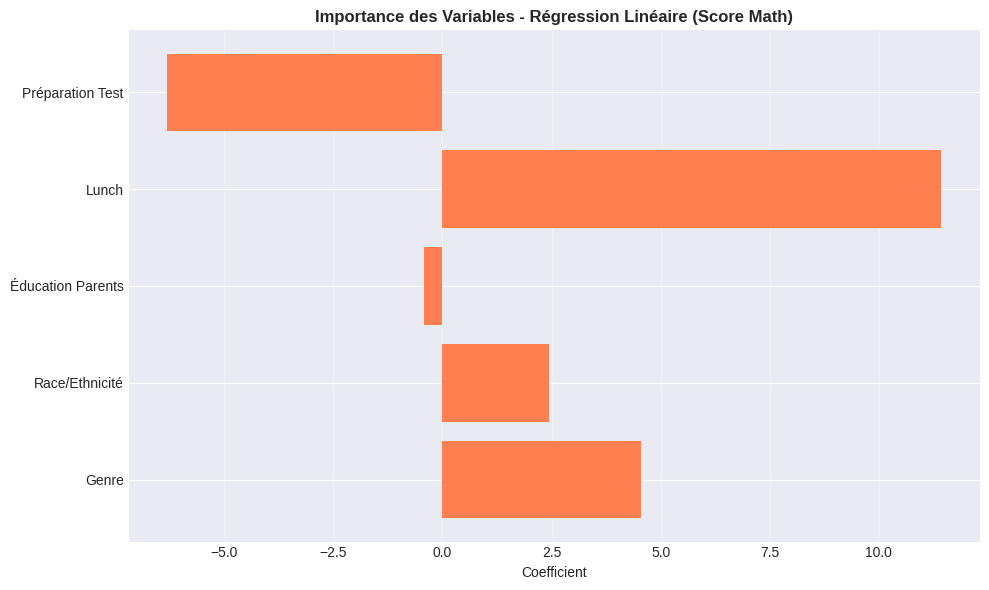

✓ Graphique sauvegardé: importance_variables_lineaire.png


In [24]:
# 5.4: Importance des variables
print("\n5.4: Importance des variables")
feature_names = ['Genre', 'Race/Ethnicité', 'Éducation Parents', 'Lunch', 'Préparation Test']
coefficients = lr_math.coef_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='coral')
plt.xlabel('Coefficient')
plt.title('Importance des Variables - Régression Linéaire (Score Math)', fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('importance_variables_lineaire.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique sauvegardé: importance_variables_lineaire.png")

In [25]:
# ============================================================================
# ÉTAPE 6: RÉGRESSION LOGISTIQUE
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 6: RÉGRESSION LOGISTIQUE")
print("="*80)


ÉTAPE 6: RÉGRESSION LOGISTIQUE


In [27]:
# 6.1: Préparation des données pour régression logistique
print("\n6.1: Préparation des données pour classification")
# Variable cible: performance_category (0=Fail, 1=Pass)
X_log = df_encoded[['gender_encoded', 'race_encoded', 'education_encoded', 'lunch_encoded', 'test_prep_encoded']]
y_log = df_encoded['performance_category']

print(f"Distribution des classes:")
print(y_log.value_counts())
print(f"  - Fail (score moyen < 50): {(y_log == 0).sum()} étudiants")
print(f"  - Pass (score moyen >= 50): {(y_log == 1).sum()} étudiants")

# Division train/test
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42, stratify=y_log)


6.1: Préparation des données pour classification
Distribution des classes:
performance_category
1    897
0    103
Name: count, dtype: int64
  - Fail (score moyen < 50): 103 étudiants
  - Pass (score moyen >= 50): 897 étudiants


In [28]:
# 6.2: Entraînement du modèle de régression logistique
print("\n6.2: Entraînement du modèle de régression logistique")
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_log, y_train_log)

# Prédictions
y_pred_log = log_reg.predict(X_test_log)
y_pred_proba = log_reg.predict_proba(X_test_log)[:, 1]



6.2: Entraînement du modèle de régression logistique


In [29]:
# 6.3: Évaluation du modèle
print("\n6.3: Évaluation du modèle")
print("\nRapport de classification:")
print(classification_report(y_test_log, y_pred_log, target_names=['Fail', 'Pass']))



6.3: Évaluation du modèle

Rapport de classification:
              precision    recall  f1-score   support

        Fail       0.00      0.00      0.00        21
        Pass       0.90      1.00      0.94       179

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.80      0.90      0.85       200




6.4: Matrice de confusion


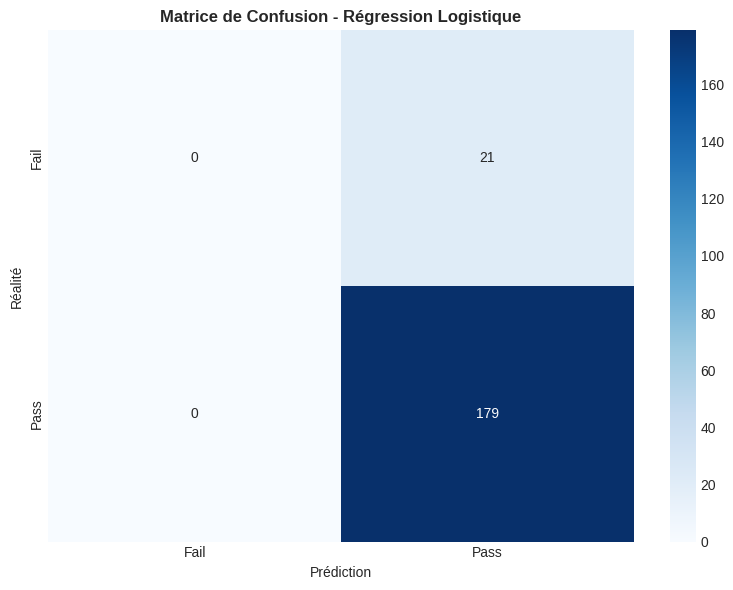

✓ Graphique sauvegardé: matrice_confusion_logistique.png


In [31]:
# 6.4: Matrice de confusion
print("\n6.4: Matrice de confusion")
cm = confusion_matrix(y_test_log, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion - Régression Logistique', fontweight='bold')
plt.tight_layout()
plt.savefig('matrice_confusion_logistique.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique sauvegardé: matrice_confusion_logistique.png")



6.5: Visualisation des probabilités prédites


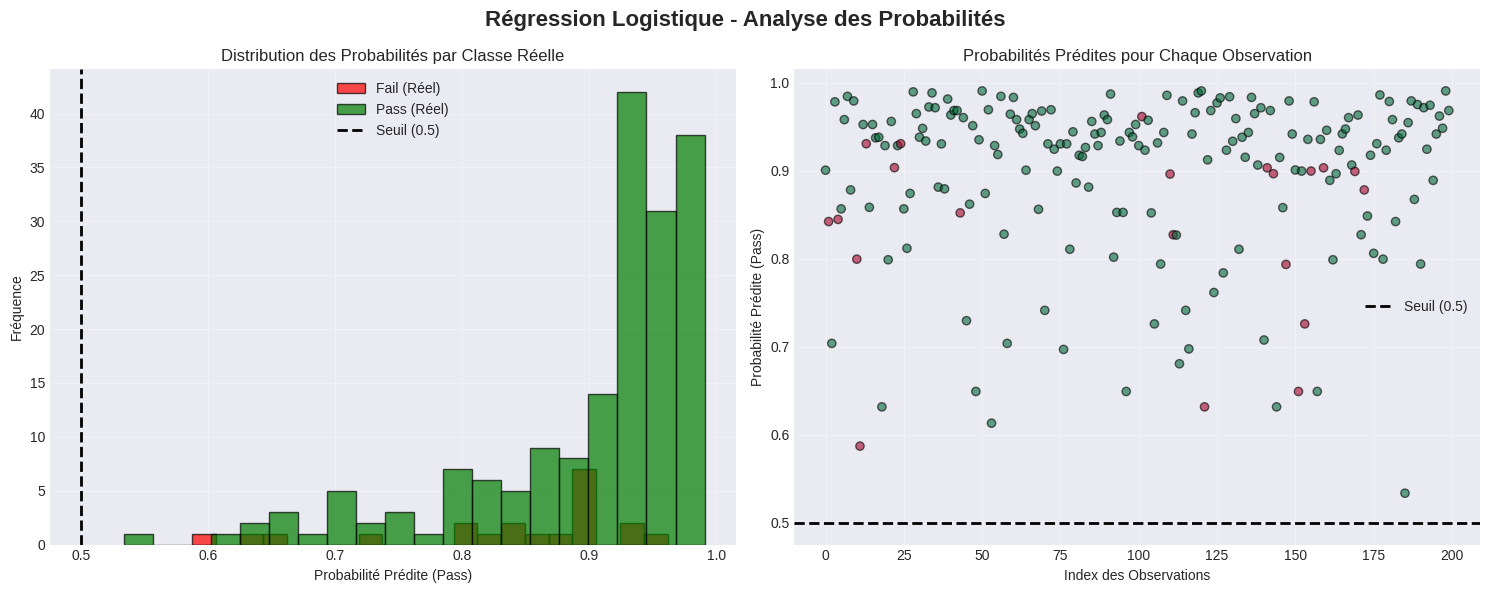

✓ Graphique sauvegardé: regression_logistique_probabilites.png


In [32]:
# 6.5: Courbe de probabilité
print("\n6.5: Visualisation des probabilités prédites")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Régression Logistique - Analyse des Probabilités', fontsize=16, fontweight='bold')

# Distribution des probabilités par classe réelle
axes[0].hist(y_pred_proba[y_test_log == 0], bins=20, alpha=0.7, label='Fail (Réel)', color='red', edgecolor='black')
axes[0].hist(y_pred_proba[y_test_log == 1], bins=20, alpha=0.7, label='Pass (Réel)', color='green', edgecolor='black')
axes[0].axvline(0.5, color='black', linestyle='--', linewidth=2, label='Seuil (0.5)')
axes[0].set_xlabel('Probabilité Prédite (Pass)')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution des Probabilités par Classe Réelle')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter plot: Index vs Probabilité
axes[1].scatter(range(len(y_pred_proba)), y_pred_proba, c=y_test_log, cmap='RdYlGn', alpha=0.6, edgecolors='black')
axes[1].axhline(0.5, color='black', linestyle='--', linewidth=2, label='Seuil (0.5)')
axes[1].set_xlabel('Index des Observations')
axes[1].set_ylabel('Probabilité Prédite (Pass)')
axes[1].set_title('Probabilités Prédites pour Chaque Observation')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('regression_logistique_probabilites.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique sauvegardé: regression_logistique_probabilites.png")


6.6: Coefficients de la régression logistique
Coefficients: [-0.5894373   0.4047588  -0.10865762  1.03112922 -0.85778509]
Intercept: 2.0174


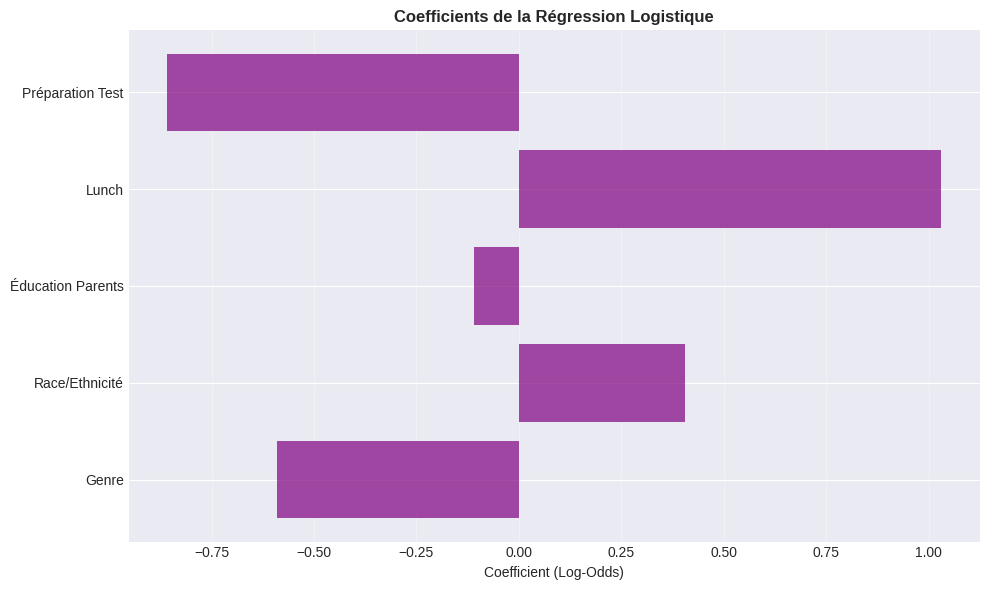

✓ Graphique sauvegardé: coefficients_regression_logistique.png


In [33]:
# 6.6: Coefficients de la régression logistique
print("\n6.6: Coefficients de la régression logistique")
coefficients_log = log_reg.coef_[0]
print(f"Coefficients: {coefficients_log}")
print(f"Intercept: {log_reg.intercept_[0]:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients_log, color='purple', alpha=0.7)
plt.xlabel('Coefficient (Log-Odds)')
plt.title('Coefficients de la Régression Logistique', fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('coefficients_regression_logistique.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Graphique sauvegardé: coefficients_regression_logistique.png")


In [34]:
# ============================================================================
# ÉTAPE 7: RÉSUMÉ ET CONCLUSIONS
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 7: RÉSUMÉ DE L'ANALYSE")
print("="*80)

print("\n📊 STATISTIQUES DESCRIPTIVES:")
print(f"  • Score moyen en mathématiques: {df_clean['math_score'].mean():.2f} (±{df_clean['math_score'].std():.2f})")
print(f"  • Score moyen en lecture: {df_clean['reading_score'].mean():.2f} (±{df_clean['reading_score'].std():.2f})")
print(f"  • Score moyen en écriture: {df_clean['writing_score'].mean():.2f} (±{df_clean['writing_score'].std():.2f})")
print(f"  • Score moyen global: {df_clean['average_score'].mean():.2f} (±{df_clean['average_score'].std():.2f})")

print("\n📈 RÉSULTATS RÉGRESSION LINÉAIRE:")
print(f"  • R² Score: {r2_math:.4f}")
print(f"  • RMSE: {rmse_math:.4f}")
print(f"  • Le modèle explique {r2_math*100:.2f}% de la variance des scores de mathématiques")

print("\n🎯 RÉSULTATS RÉGRESSION LOGISTIQUE:")
accuracy = (y_pred_log == y_test_log).sum() / len(y_test_log)
print(f"  • Précision globale: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  • Taux de réussite: {(df_clean['performance_category'] == 1).sum() / len(df_clean) * 100:.2f}%")

print("\n💡 FACTEURS CLÉS IDENTIFIÉS:")
coef_dict = dict(zip(feature_names, lr_math.coef_))
sorted_coefs = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)
for i, (feature, coef) in enumerate(sorted_coefs, 1):
    impact = "positif" if coef > 0 else "négatif"
    print(f"  {i}. {feature}: {coef:.4f} (impact {impact})")

print("\n✅ ANALYSE TERMINÉE AVEC SUCCÈS!")
print("Tous les graphiques ont été sauvegardés dans le répertoire courant.")
print("="*80)


ÉTAPE 7: RÉSUMÉ DE L'ANALYSE

📊 STATISTIQUES DESCRIPTIVES:
  • Score moyen en mathématiques: 66.09 (±15.16)
  • Score moyen en lecture: 69.17 (±14.60)
  • Score moyen en écriture: 68.05 (±15.20)
  • Score moyen global: 67.77 (±14.26)

📈 RÉSULTATS RÉGRESSION LINÉAIRE:
  • R² Score: 0.1663
  • RMSE: 14.2434
  • Le modèle explique 16.63% de la variance des scores de mathématiques

🎯 RÉSULTATS RÉGRESSION LOGISTIQUE:
  • Précision globale: 0.8950 (89.50%)
  • Taux de réussite: 89.70%

💡 FACTEURS CLÉS IDENTIFIÉS:
  1. Lunch: 11.4361 (impact positif)
  2. Préparation Test: -6.3058 (impact négatif)
  3. Genre: 4.5417 (impact positif)
  4. Race/Ethnicité: 2.4453 (impact positif)
  5. Éducation Parents: -0.4175 (impact négatif)

✅ ANALYSE TERMINÉE AVEC SUCCÈS!
Tous les graphiques ont été sauvegardés dans le répertoire courant.
